In [11]:
import pandas as pd

df = pd.read_csv('data.csv')  # read df from csv file

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d-%m-%Y %H;%M:%S')
df = df.drop(columns=['Date', 'Time'])
df.set_index('Datetime', inplace=True)

# using month and hour as features
df['Month'], df['Day'], df['Hour']  = df.index.month, df.index.day, df.index.hour 
print(df[:4])

                      Load  Month  Day  Hour
Datetime                                    
2007-10-01 00:00:00  1.324     10    1     0
2007-10-01 00:01:00  1.320     10    1     0
2007-10-01 00:02:00  1.318     10    1     0
2007-10-01 00:03:00  1.320     10    1     0


Peak load: 7.624 Peak load without control: 7.624


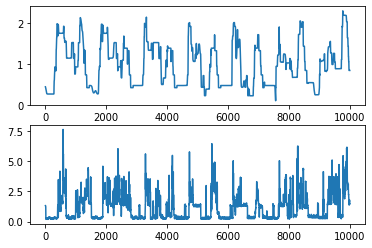

In [16]:
from System import Plant
from Policy import Policy
import matplotlib.pyplot as plt

dt = 1/60
plant = Plant(dt)
plant_comp = Plant(dt)
plant.reset(init_battery=0, init_month=10, init_day=1, init_hour=0)
plant_comp.reset(init_battery=0, init_month=10, init_day=1, init_hour=0)
policy = Policy()

control = []
battery = []
peak_load = []
peak_load_comp = []
pred_load = []
real_load = []

for data in df[:10000].itertuples():
    # Index=Timestamp('2007-10-01 00:00:00'), Load=1.324, Month=10, Day=1, Hour=0
    u, w_hat = policy.select_action(plant)
    control.append(u)
    # print(u, w_hat, data[1])
    pred_load.append(w_hat)
    real_load.append(data[1])
    battery.append(plant.battery.c)
    plant.step(u, data[1])
    plant_comp.step(0, data[1])
    peak_load.append(plant.x)
    peak_load_comp.append(plant_comp.x)
    
print("Peak load:", plant.x, "Peak load without control:", plant_comp.x)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(pred_load)
ax2.plot(real_load)